## numpy.random package in Python 
<div>
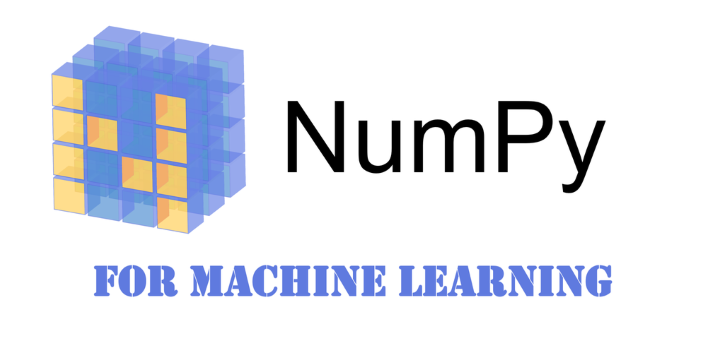
</div>

### Programming for Data Analysis
### numpy.random package
Student: Aine Nic Dhonnacha
<br>
Lecturer: Brian McGinley


NumPy stands for Numerical Python and is the fundamental package for scientific computing in Python. NumPy is essential for dealing with numberical data. The NumPy library contains multidimensional array and matrix data structures. NumPy can be used to perform a wide variety of mathematical operations on arrays. [1](https://numpy.org/doc/stable/user/absolute_beginners.html)


In [1]:
#importing all libraries needed.
import numpy as np

#import default_rng()
#The function will instantiate a Generator with numpy’s default BitGenerator.
from numpy.random import default_rng


#import plotting modules to use in notebook
import matplotlib.pyplot as plt
import seaborn as sns

## 	<h1> The overall purpose of the package; </h1>
          
<div style="text-align: justify"> The purpose of the numpy.random package is to produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions. </div> 

[2](https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#module-numpy.random)
<br>


<div style="text-align: justify">The word Pseudo is often used to describe something that is fake or deceptive. Pseudo random numbers, are not particularly fake, they would be better described as "Sort of" random, or "random-ish" but they can be deceptive as they can be manipulated to produce a predictable output. </div> 

<div style="text-align: justify"> Recently the numpy.random package has changed, Python software is constantly developing and improving. The default pseudo number generator has changed. <b>default_rng()</b> is used in new numpy.random code. </div>

~~~ 
from numpy.random import default_rng 
~~~

<div style="text-align: justify"> 
You can add default_rng to most numpy.random codes by adding <b>numpy.random.default_rng()</b> before the function for example; </div>


In [2]:
np.random.default_rng().random()

0.09715500266589516

The numpy.random documentation recomends using it as follows; but either way works the same.

In [3]:
rng = np.random.default_rng() 
vals = rng.random()
vals

0.4430778772495253

By default, Generator uses bits provided by Permuted Congruential Generator 64bit(PCG64) which has better statistical properties than the legacy MT19937 used previously. [3](https://numpy.org/devdocs/reference/random/index.html)

It is not necessary to use the <b>default_rng</b> to add the PCG64, as shown below, the old method is still available without the default_rng; at a glance it is hard to see much difference but the numpy.random documentation recomends using it in new code. 

In [4]:

np.random.random()

0.5100171528519728

### How Random Is Random? [4](https://realpython.com/python-random/)

<div style="text-align: justify"> 
Random means something that can not be predicted logically. It is dificult to produce fully random data with Python. Although computers are more equipped to produce random outputs than humans are, most random data generated with Python is psuedorandom, generated with a pseudorandom number generator(PRNG). 
PRNG is an alrogithm for generating a sequecnce of numbers. Peudorandom numbers look random, but there is a key piece of information about the random number generator you are using and if you have it, you can predict the information that is coming out of it.
John von Neumann cautioned about the misinterpretation of a PRNG as a truly random generator, and joked that "Anyone who considers arithmetical methods of producing random digits is, of course, in a state of sin."</div>

[5](https://dornsifecms.usc.edu/assets/sites/520/docs/VonNeumann-ams12p36-38.pdf)


<div style="text-align: justify"> 
The PRNG-generated sequence is not truly random, because it is completely determined by an initial value, called the PRNG's <b>seed</b>.The PRNG works by starting with an integer called a <b>seed</b> and then generates random numbers in sucession. </div>

### Seeds

<b>Seed determines the sequence of pseudorandom numbers that will be generated.</b>

<div>
<img src="Random_Seed.PNG" width="300"/>
</div>

[Image from sharpsightlabs.com ](https://www.sharpsightlabs.com/blog/numpy-random-seed/)


<div style="text-align: justify"> The same seed, gives the same sequence of random numbers. To have reproducable code, seed the random number generator function using the np.random.seed() function.</div>
    
[6](https://www.datacamp.com/community/tutorials/numpy-random) 
    
<div style="text-align: justify"> The random number generator needs a number to start with, a seed value,  to be able to generate a random number. By default the random number generator uses the current system's time.</div> 
    
[7](https://www.w3schools.com/python/ref_random_seed.asp)


Demonstrates that by using the same seed 3times, the same random number is generated. 
- np.random.seed(15)
> 0.8488176972685787

- np.random.seed(15)
> 0.8488176972685787


-  np.random.seed(15)
> 0.8488176972685787

 [7](https://www.w3schools.com/python/ref_random_seed.asp)

<div style="text-align: justify"> Recently the random number generator in numpy.random has been upgraded from the Mersenne twister method to the Permuted Congruential Generator 64bit(PCG64).
PCG64 makes a guarantee that a fixed seed and will always produce the same random integer stream.
The preferred way to use a BitGenerator in parallel applications is to use the SeedSequence.spawn method to obtain entropy values, and to use these to generate new BitGenerators: </div>
    
[8](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#r4523891264fe-1) 



>from numpy.random import Generator, PCG64, SeedSequence

>sg = SeedSequence(1234)

>rg = [Generator(PCG64(s)) for s in sg.spawn(10)]
[8](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#r4523891264fe-1)

<div style="text-align: justify"> <b> PCG-64</b> is a 128-bit implementation of O’Neill’s permutation congruential generator.</div>

<div style="text-align: justify"> There are two functions to a random number generator;
    
<b>The State-Transition Function</b> Governs how the random number generator's internal state changes every time you ask for a random number.
The Permutation Congruential Generator(PCG) uses a linear congruential generator as the state-transition function. Linear congruential generators are one of the oldest and best-known PseudoRandom Number Generator(RNG) algorithms, they are also known to be statistically weak, but since PCG's state transition only does half the work, it does not need to be perfect. 



<b>The Output Function</b> Turns the Random Number Generator's internal state into the actual random number.
The Permutation Congruential Generator(PCG) uses a new technique called permutation functions on tuples to produce output that is much more random than the RNG's internal state. PCG's output functions are what gives it its excellent statistical performance.</div>

[9](https://www.pcg-random.org/)


### Why use PRNGS over TRNGS?

<div style="text-align: justify"> Psuedo number generators tend to be more efficent than True random number generators in terms of regularity and speed which makes TRNGS less suitable for applications that require data at regular stages or appications that require huge amounts of data.
TRNGS are preferred for tasks such as gaming, gambling and data encryption. 
PRNGS are more suitable for simulation and modeling applications, which often require more data that they can generate more efficiently than TRNGS which have a non-deterministic nature. </div>

<div style="text-align: justify"> 
Random number generation can be tricky to grasp at first, but its widespread benefits are enormous. Whether it’s analyzing a sector, testing a new product or providing a true and random basis for a whole industry, TRNGs and PRNGs provide value for almost every industry.</div>
    
[10](https://dataconomy.com/2017/12/random-data-can-benefit-business/)
    


##	<h1>Simple random data</h1>[11](https://numpy.org/doc/stable/reference/random/generator.html)

<b>numpy.random</b> generates an array of random numbers. The package has multiple functions to generate the random n-dimensional array for various distributions.

The basic function <b>random()</b> generates a random float uniformly in the semi-open range [0.0, 1.0) [9](https://docs.python.org/3/library/random.html) 


In [5]:
#generate random float
np.random.default_rng().random()

0.20959831183401856

In [6]:
#running again to show a different random float
np.random.default_rng().random()


0.47577613434874033

<b>.rand</b> - returns a random float between 0 and 1.

In [7]:
np.random.rand()


0.18082132588707023

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]]),
 array([0.00867637, 0.09485406, 0.18103174, 0.26720943, 0.35338712,
        0.4395648 , 0.52574249, 0.61192017, 0.69809786, 0.78427555,
        0.87045323]),
 <a list of 4 Lists of Patches objects>)

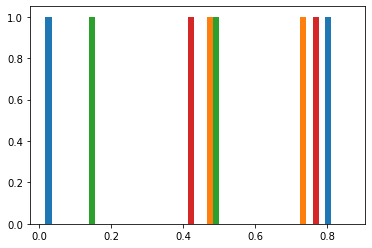

In [8]:
#plotting random arrays
x = np.random.rand(2,4) 
plt.hist(x)

<b>integers</b> - Return random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive). #[8](https://numpy.org/doc/stable/reference/random/generator.html)

In [9]:
np.random.default_rng().integers(5, size=(1, 4))

array([[1, 2, 2, 2]], dtype=int64)

We can specify how many random numbers we want with the <b> (size = ) </b> key word argument. 


<b> numpy.random.randint</b>

In [10]:
#Using the size parameter to specify the shape of the array.
np.random.randint(5, size=4) 

array([3, 2, 2, 3])

In [11]:
np.random.randint(5, size=(2, 4))

array([[2, 4, 3, 0],
       [4, 4, 4, 0]])

<div style="text-align: justify"> <b>Randint</b> function will output a random integer between the numbers we specify. Such random functions are great for simulation games. Below we roll a dice by selecting the integers 1 and 6 (numbers on a die). The funcion will output a random selection from those numbers. </div>


In [12]:
# a random integer between 1 and 6
roll_a_dice = np.random.randint(1, 6)
roll_a_dice

1

In [13]:
#Simulate rolling dice twice with (size = ) key word argument.
roll_a_dice = np.random.randint(1, 6, size = (2))
#returns an array with both random numbers
roll_a_dice

array([2, 3])

<div style="text-align: justify"> randint is a part of the old numpy.random documentation, it is now encouraged to use the <b>default().integers</b> method in new code. 
Similar to randint, only for the closed interval [low, high], and 1 is the lowest value if high is omitted.</div>

[12](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randint.html#numpy.random.randint)


In [14]:
roll_a_dice = np.random.default_rng().integers(1, 7)
roll_a_dice

2

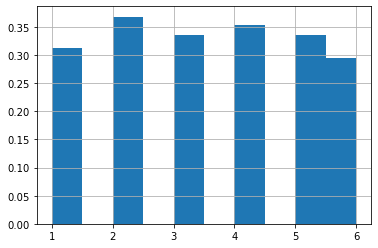

In [15]:
# Roll a dice 1000 time and show histogram of the results 

x = np.random.default_rng().integers(1, 7, 1000)



# Histogram
#We expect to see each number represented a similiar amount of times for it to be random. 
count, bins, ignored = plt.hist(x, density=True)
plt.grid(True)
plt.show()

<b>random</b> - returns array of random floats in the half-open interval [0.0, 1.0)

In [16]:
default_rng().random()
type(default_rng().random())
default_rng().random((5,))

array([0.04727016, 0.62449005, 0.38536012, 0.68371859, 0.7457183 ])

<div style="text-align: justify"> <b>choice</b> -  Generates a random sample from a given 1-D array, as the name suggests it  allows us to choose the probability for each value.

The probability is set by a number between 0 and 1, where 0 means that the value will never occur and 1 means that the value will always occur. [10](https://www.w3schools.com/python/numpy_random_distribution.asp)</div>


In [17]:
#Generate a 1-D array containing 50 values, where each value has to be 3, 5, 7 or 9.
#[w3schools](https://www.w3schools.com/python/numpy_random_distribution.asp)

#The probability for the value to be 3 is set to be 0.1, etc.. 

x = np.random.default_rng().choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(50))

print(x)

[7 7 7 3 5 5 5 7 3 7 7 5 7 5 5 7 5 7 5 7 7 5 7 7 7 7 7 7 7 5 7 7 5 3 7 7 5
 7 7 7 7 7 7 7 5 7 5 5 7 7]


In [18]:
#Generate a uniform random sample from np.arange(5) of size 3
np.random.default_rng().choice(5, 3)

array([4, 1, 1], dtype=int64)

In [19]:
#choice can also be used for strings, for example, simulating a coin flip
np.random.default_rng().choice(["Heads I win", "Tails you loose"])

'Heads I win'

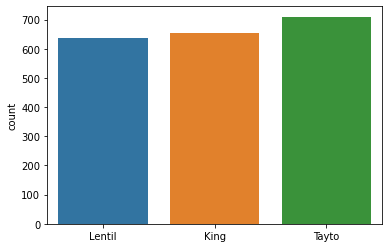

In [20]:
#plotting with numpy.choice  #https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
# creating list of brands of crisps
brand = ["King", "Tayto", "Lentil"]
#asks numpy to choose random selections from the list
crisps = np.random.default_rng().choice(brand, 2000)
list(crisps)
sns.countplot(x = crisps)

If it is truly random, we expect to see each brand of crisp about a third of the time. 


<b>bytes</b>-  Return random bytes.

In [21]:
#return random bytes
#np.random.default_rng().bytes(10)

<div style="text-align: justify"> 
    





## Permutations
<div style="text-align: justify"> In mathematics, a permutation of a set is, an arrangement of its members into a sequence or linear order, or if the set is already ordered, a rearrangement of its elements. The word "permutation" also refers to the act or process of changing the linear order of an ordered set. </div>

[13](https://www.mathsisfun.com/combinatorics/combinations-permutations.html)
    
A permutation is an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa.



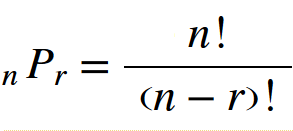

[14](https://www.w3schools.com/python/numpy_random_permutation.asp)

<div style="text-align: justify">
The numpy.random package has two methods for this: 

- shuffle()	Modify a sequence in-place by shuffling its contents.
- permutation()	Randomly permute a sequence, or return a permuted range.</div>

<b>numpy.random.shuffle()</b> This method makes changes to the original array.



In [22]:
#arranging the shuffle
arr = np.arange(10)

#shuffling 
default_rng().shuffle(arr)

#outputing the shuffled array
arr

array([9, 7, 3, 2, 4, 6, 5, 1, 8, 0])

In [23]:
#This function only shuffles the array along the first index of a multi-dimensional array:
arr = np.arange(9).reshape((3, 3))

np.random.shuffle(arr)

arr

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

<b>numpy.random.permutation()</b> This method returns a re-arranged array (and leaves the original array un-changed).

In [24]:
#same inputs in the permutation function, gives arrays that are in order. 
arr = np.arange(9).reshape((3, 3))

np.random.permutation(arr)

arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [25]:
#Using default_rng() to construct a new Generator with the default BitGenerator (PCG64).
rng = np.random.default_rng()

rng.permutation(10)


array([6, 9, 4, 5, 3, 2, 1, 7, 8, 0])

In [26]:
rng = np.random.default_rng()
rng.permutation([1, 4, 9, 12, 15])

array([ 9,  1, 15,  4, 12])

In [27]:
#It is not necessary to use the default_rng to add the PCG64, but it is recomended in new code using the numpy.random package. 
np.random.permutation([1, 4, 9, 12, 15])

array([15,  9,  1, 12,  4])

In [28]:
#permute a list
x = np.random.permutation([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
print ("List after permutation: ",  x)

List after permutation:  [ 2 10 18 20 22 12  6 16  4 14  8]


In [29]:
#shuffle same list
x = np.random.shuffle([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
print ("List after shuffle: ",  x)

List after shuffle:  None


Shuffle works in place and therefore does not return a value.

## 	Distributions



<div style="text-align: justify"> Distribution is a statistical concept used in data research. Data Distribution is a list of all possible values, and how often each value occurs. This is important when working with data science and statistics. The numpy.random package provides methods that return randomly generated data distributions
A random distribution is a set of random numbers that follow a certain probability density function. </div>
   
   [15](https://www.w3schools.com/python/numpy_random_distribution.asp)
     
<div style="text-align: justify">
Distributions generate random numbers according to different probabilities across different intervals. 


Distribution plots are a great way to visualise these distributions, Seaborns sns.distplot() take as input an array and plots a curve corresponding to the distribution points in the array. </div>



<div style="text-align: justify"> There are many distributions in the numpy.random package. We will be looking at five. Distributions are either discrete or continuous. 

<b>Continuous distributions</b> where data can take on any value within a specified range and can have an infinate number of possible values. </div>
    
  [16](https://www.statistics.com/glossary/continuous-vs-discrete-distributions/)
 <div style="text-align: justify">    
- Normal distribution
- Logistic distribution
- Uniform distribution


<b>Discrete distributions</b> data can only take on certain values, such as integers. For a discrete distribution, probabilities can be assigned to the values in the distribution - for example, "the probability that the web page will have 10 clicks in an hour is 0.12." </div> [16](https://www.statistics.com/glossary/continuous-vs-discrete-distributions/)
- Binomial distribution
- Poisson distribution


<div style="text-align: justify"> "A probability distribution is a formula or a table used to assign probabilities to each possible value of a random variable X. A discrete distribution means that X can assume one of a countable (usually finite) number of values, while a continuous distribution means that X can assume one of an infinite (uncountable) number of different values."[BuisnessStatsforDummies](https://www.dummies.com/education/math/business-statistics/differentiate-between-discrete-and-continuous-probability-distributions/)</div>

### Normal Distribution 
<b>It is also called the Gaussian Distribution after the German mathematician Carl Friedrich Gauss.</b> 



<img src="gauss.png" width="300"/>



[image from google](https://twitter.com/fieldsinstitute/status/834804736830357506)


<div style="text-align: justify"> Normal distributions are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. They are important in statistics. They are also known to be "bell-shaped". The normal distribution is one of the most important probability distributions in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. </div>

[17](https://statisticsbyjim.com/basics/normal-distribution/#:~:text=The%20normal%20distribution%20is%20the,distribution%20and%20the%20bell%20curve)


~~~
"The area under the curve of a normal distribution represents the sum of the probabilities of obtaining every possible value for a variable. The total area under a normal curve is equal to one. The shape of the normal distribution represents specified mathematically in terms of only two parameters: the mean (µ), and the standard deviation ([.sigma]). The standard deviation specifies the amount of dispersion around the mean, whereas the mean is the average value across sampled values of the variable. It is a characteristic of normal distribution that 95 percent of the possible values for a variable lie within –2 standard deviations." 
~~~
    
[18](https://www.encyclopedia.com/science-and-technology/mathematics/mathematics/normal-distribution#3)


<div>
<img src= "numpy-random-normal.PNG" width="400"/>
</div>

[image from google](https://www.sharpsightlabs.com/blog/numpy-random-normal/)




It has three parameters:

loc(mean) - where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array. (int or tuple of ints are optional)

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

numpy.random.normal is more likely to return samples lying close to the mean, rather than those far away. </div>


In [30]:
# Generate a random normal distribution of size 3x4:
x = np.random.default_rng().normal(size=(3, 4))

print(x)

[[ 1.11534855 -1.40272787  2.09056109  0.33401145]
 [ 0.60751632  0.2624458   0.16623382  0.40582385]
 [-0.24978464 -0.23913601  1.17523399  2.05125852]]


In [31]:
#Generates a random normal distribution of size 3x4 with mean at 1 and standard deviation of 2:

x = np.random.default_rng().normal(loc=1, scale=2, size=(3, 4))

print(x)

[[-1.49145159  3.66143734  0.90480798  0.07948034]
 [ 2.08275177  1.26965361  2.01918628 -0.28410777]
 [ 4.09499923  1.45119632 -0.1897332  -0.966142  ]]


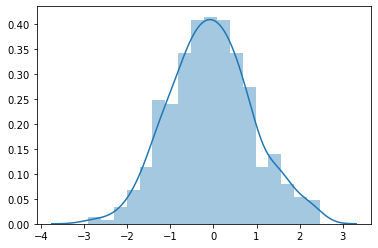

In [32]:
#np.random.normal distribution plot, here we can see the bell shape. 
# areas under this curve represent probabilities.
sns.distplot(np.random.default_rng().normal(size=500))

plt.show()

(array([3.8000e+01, 6.1100e+02, 5.2310e+03, 1.9819e+04, 3.4497e+04,
        2.7786e+04, 1.0141e+04, 1.7090e+03, 1.6200e+02, 6.0000e+00]),
 array([-7.58688008, -5.76719732, -3.94751456, -2.1278318 , -0.30814904,
         1.51153372,  3.33121647,  5.15089923,  6.97058199,  8.79026475,
        10.60994751]),
 <a list of 10 Patch objects>)

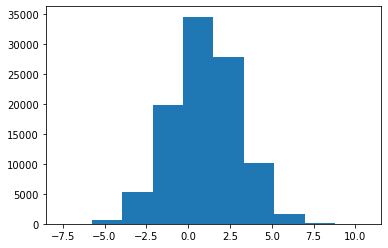

In [33]:
#np.random.default_rng().normal(mu,sigma,1000)
x = np.random.default_rng().normal(1, 2, 100000)
plt.hist(x)

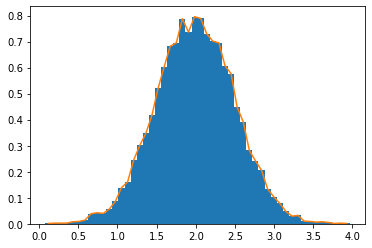

In [34]:
import numpy as np
rng = np.random.default_rng(1)
import matplotlib.pyplot as plt
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = rng.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=1)       # matplotlib version (plot)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)

Aboce code from the [numpy documentation](https://numpy.org/doc/stable/user/quickstart.html#histograms). It shows the bell curve. The normal distribution is great for dealing with large sets of data, it is recomended to use large numbers for the size/shape, such as 10, 000. to get a real feel as to how the distribution opperates. 

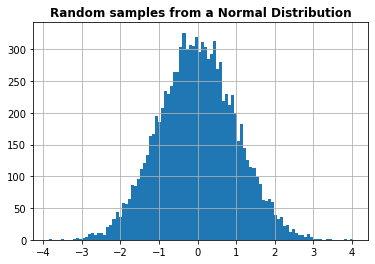

In [35]:
values= np.random.normal(0, 1, 10000)
plt.hist(values,100)
plt.title('Random samples from a Normal Distribution', fontweight = 'bold')
plt.grid(True)
plt.show()

### Logic distribution   
<b>numpy.random.default_rng().logistic(loc=0.0, scale=1.0, size=None)</b>

<div style="text-align: justify"> Logistic Distribution is used to describe growth. it is used in widely in machine learning in logistic regression. 
Logictic regression is a predictive analysis used to describe data. </div>

   [19](https://www.statisticssolutions.com/what-is-logistic-regression/)

~~~
Samples are drawn from a logistic distribution with specified parameters;

loc/mean Default 0.

scale - standard deviation,(>0).

size - The shape of the returned array.
~~~ 

The probability density for the Logistic distribution is:
<div>
<img src= "logic.PNG" width="300"/>
</div>

<div style="text-align: justify"> The logic distributions is used by the World Chess Federation (FIDE) where it is used in the Elo ranking system, assuming the performance of each player is a logistically distributed random variable.</div>
 
[20](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.logistic.html#numpy.random.Generator.logistic)

The logistic distribution is very similiar to the Normal distribution, it basically adds logic to the mix.

In [36]:
#Draw samples from a logistic distribution with mean at 3 and stddev 4.0
x = np.random.default_rng().logistic(loc=3, scale=4, size=(3, 4))

print(x)

[[  5.32750939   2.76687661 -17.84772294  13.52253273]
 [ 12.73568821   7.77859822   3.09455071   0.62243064]
 [  4.42603888   7.21867929   3.6549324   11.01357396]]


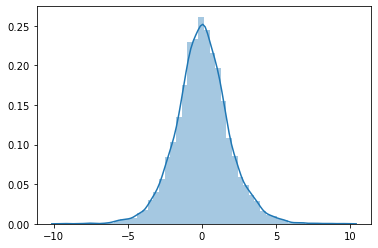

In [37]:
#plot random logic
sns.distplot(np.random.default_rng().logistic(size=10000))

plt.show()

Similiar to the Normal distribution, the bigger the size, the more prominent the curve. 

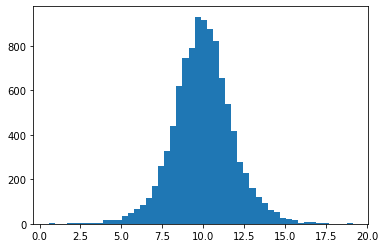

In [38]:
loc, scale = 10, 1
s = np.random.default_rng().logistic(loc, scale, 10000)
count, bins, ignored = plt.hist(s, bins=50)

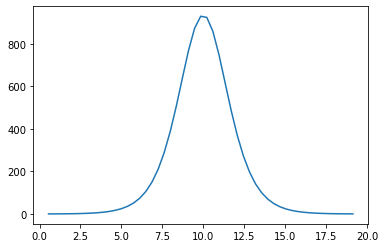

In [39]:
#code from the numpy Documentation showibng plotting against the distribution
def logist(x, loc, scale):
    return np.exp((loc-x)/scale)/(scale*(1+np.exp((loc-x)/scale))**2)
lgst_val = logist(bins, loc, scale)
plt.plot(bins, lgst_val * count.max() / lgst_val.max())
plt.show()

####  Logistic and Normal Distribution
-are very similiar but logictic distribution represents more possibility of occurance of the events further from the mean. 

We can see this difference clearly in the displot below; 

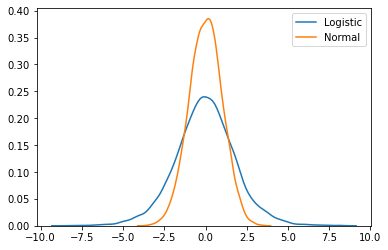

In [40]:
sns.distplot(np.random.logistic(size=10000), hist=False, label='Logistic')
sns.distplot(np.random.normal(size=10000), hist=False, label='Normal')


plt.show()

### Uniform distribution
<b>numpy.random.uniform(low=0.0, high=1.0, size=None)</b>

<div style="text-align: justify"> It is used to  to describe probability where every event has equal chances of occuring. </div>
 
  [21](https://www.w3schools.com/python/numpy_random_uniform.asp)
 
<div style="text-align: justify">For example, "if the length of time until the next defective part arrives on an assembly line is equally likely to be any value between one and ten minutes, then you may use the uniform distribution to compute probabilities for the time until the next defective part arrives."</div>

  [22](https://www.dummies.com/education/math/business-statistics/differentiate-between-discrete-and-continuous-probability-distributions/)

~~~
It has three parameters:

Low - default 0 .0.

High- default 1.0.

Size - The shape of the returned array.
~~~

<div style="text-align: justify">Any value within the given interval is equally likely to be drawn by uniform.</div>

The probability density function of the uniform distribution is 
<div>
    <img src= "u.distribution.png" width="100"/>
</div>

[21](https://www.w3schools.com/python/numpy_random_uniform.asp)</div>

In [41]:
#Create a 3x4 uniform distribution sample
x = np.random.default_rng().uniform(size=(3, 4))

print(x)

[[0.5692724  0.59446825 0.92474233 0.44398451]
 [0.27977391 0.22242164 0.16369236 0.12125617]
 [0.6528122  0.82142885 0.11120509 0.55542051]]


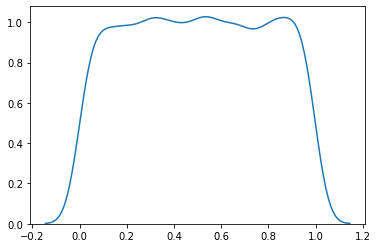

In [42]:
#Visualise uniform distribution
sns.distplot(np.random.default_rng().uniform(size=10000), hist=False)

plt.show()

The displot shows clearly the consistency of the uniform distribution. 

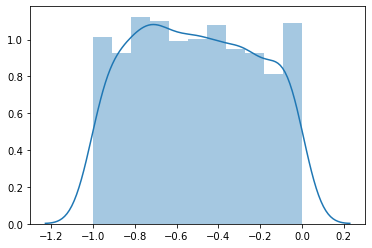

In [43]:
#adding values for visualisation
sns.distplot(np.random.default_rng().uniform(-1,0,1000))
plt.show()

### Binomial Distribution

<div style="text-align: justify"> Binomial Distribution is a Discrete Distribution. It shows probabilities of a discrete, which means countable outcomes, such as 1, 2, 3. The continuous probabilities distributions and the random variables they describe are the basis of probability theory and statistical analysis.</div>


   [23](https://www.investopedia.com/terms/d/discrete-distribution.asp#:~:text=A%20discrete%20distribution%20is%20a,%2C%202%2C%203...&text=Overall%2C%20the%20concepts%20of%20discrete,probability%20theory%20and%20statistical%20analysis.)


<div style="text-align: justify"> e.g. a coin toss's result is discrete as it can be only head or tails.
The binomial distribution is often used to compute probabilities for a process where only one of two possible outcomes may occur on each trial.</div>


The probability density for the Binomial distribution is:
<div>
<img src= "binomial_dist.png" width="200"/>
</div>

 [24](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.binomial.html#numpy.random.binomial)

Binomial has three parameters:

n - number of trials.

p - probability of occurence of each trial (e.g. for toss of a coin 0.5 each).

size - 

[25](https://www.w3schools.com/python/numpy_random_binomial.asp)


In [44]:
#tossing a coin once, 0.5 represents the probability of getting heads, output is 1 if we get heads and 0 if we get tails
x = np.random.binomial(n=1, p=0.5)

print(x)

0


In [45]:
#now we toss it 8times and repeat a further 8 to see how many times we get heads. 
x = np.random.binomial(n=8, p=0.5, size = 16)

print(x)

[6 3 2 5 2 3 4 5 3 4 4 5 7 3 1 3]


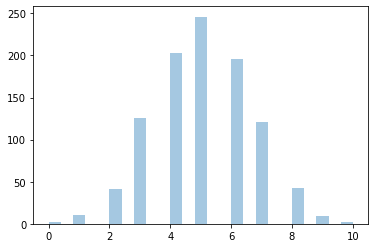

In [46]:
# showing on a plot
sns.distplot(np.random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()

[5 3 5 9 9 4 6 5 6 4 5 3 7 3 3 6 6 7 4 6 5 8 5 2 5 3 5 6 7 7 6 5 4 5 5 3 3
 8 4 5 4 4 5 6 7 4 5 7 6 7 2 5 2 5 5 4 4 6 7 4 5 4 6 7 5 2 5 3 6 8 4 5 6 3
 5 6 6 4 7 3 6 4 5 5 4 7 5 4 3 3 6 4 3 7 8 2 4 3 3 2]


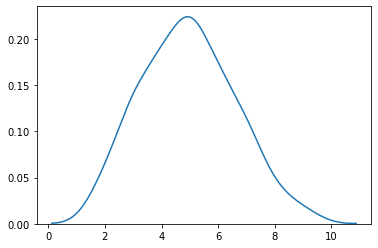

In [47]:
#simulates flipping a coin 100 times 
x=np.random.binomial(n=10, p=0.5, size = 100)
print(x)


sns.distplot(x, hist = False)



<b>Binomial is discrete and the normal distribution is continuous, but if there are enough data points they will be quite similar with certain loc and scale.</b>

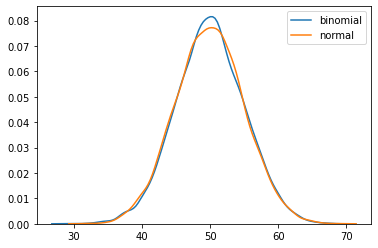

In [48]:
sns.distplot(np.random.binomial(n=100, p=0.5, size=10000), hist=False, label='binomial')
sns.distplot(np.random.normal(loc=50, scale=5, size=10000), hist=False, label='normal')

plt.show()

With less data points, their difference becomes apparant: 

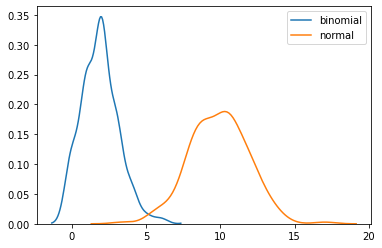

In [49]:
sns.distplot(np.random.binomial(n=10, p=0.2, size=200), hist=False, label='binomial')
sns.distplot(np.random.normal(loc=10, scale=2, size=200), hist=False, label='normal')

plt.show()

### Poisson Distribution
<div style="text-align: justify"> Poisson Distribution is a Discrete Distribution.

It estimates how many times an event can happen in a specified time. e.g. If someone brushes their teeth twice a day, what is the probability they will do it three times?
You can use the Poisson distribution to measure the probability that a given number of events will occur during a given time frame.[discon](https://www.dummies.com/education/math/business-statistics/differentiate-between-discrete-and-continuous-probability-distributions/)

It has two parameters:

lam - known number of occurences 

size - The shape of the returned array.</div>

<div>
    <img src= "poisson.png" width="100"/>
</div>

[26](https://www.w3schools.com/python/numpy_random_poisson.asp)

In [50]:
x = np.random.poisson(lam=2, size=8)

print(x)

[1 2 3 2 2 4 0 0]


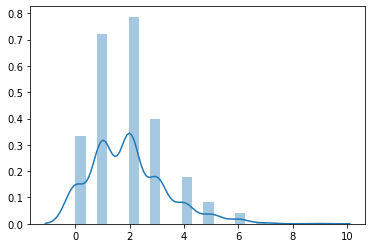

In [51]:
sns.distplot(np.random.poisson(lam=2, size=1000))

plt.show()

<div style="text-align: justify"> <b>Comparing Normal and Poisson Distribution</b>
Normal distribution is continous whereas poisson is discrete.
Similar to Binomial distribution for a large enough distrbution it will become similar with certain std dev and mean.</div>

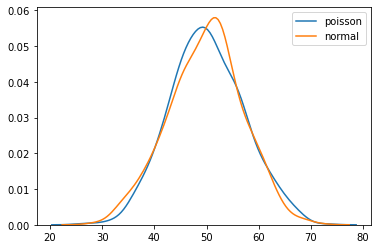

In [52]:
sns.distplot(np.random.poisson(lam=50, size=1000), hist=False, label='poisson')
sns.distplot(np.random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')


plt.show()

<div style="text-align: justify"> <b> Comparing Poisson and Binomial Distribution</b>
There is a subtle difference, binomial is for discrete trials and poisson, although also discrete can be used to continuous trials.
But for very large n and near-zero p binomial distribution is near identical to poisson distribution such that n * p is nearly equal to lam.</div> 
    
[26](https://www.w3schools.com/python/numpy_random_poisson.asp)

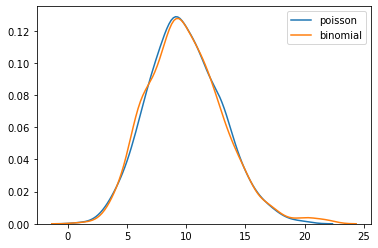

In [53]:
sns.distplot(np.random.poisson(lam=10, size=1000), hist=False, label='poisson')
sns.distplot(np.random.binomial(n=1000, p=0.01, size=1000), hist=False, label='binomial')


plt.show()

##	<h1>The use of seeds in generating pseudorandom numbers</h1>



<div style="text-align: justify"> In order to explain the use of seeds in generating pseudoranom numbers, it is important to fully understand what pseudorandom numbers are. I have previously discussed that Pseudo-random numbers are numbers that appear to be random, but are not actually random. </div>


[27](https://mathworld.wolfram.com/PseudorandomNumber.html)

<div style="text-align: justify"> encyclopedia defines the term Pseudorandom number as
" A slightly archaic term for a computer-generated random number. The prefix pseudo- is used to distinguish this type of number from a "truly" random number generated by a random physical process such as radioactive decay."</div>
<div style="text-align: justify"> 
Computers are deterministic and not random. This is a fundamental problem when using computers to simulate a random process. 
Whenever you give a computer an input, it percisely follows instructions to produce an output. </div>
<div>
<img src= "computer-transforms-inputs-to-outputs.PNG" width="500"/>
</div>

[Image from sharpsightlabs.com ](https://www.sharpsightlabs.com/blog/numpy-random-seed/)


<div style="text-align: justify">
Whenever you give a computer the same input, it will produce the same output. A computer is not random. Which introduced the problem that numpy.random and many other packages are keen to help with, using algorithms to produce random numbers from a non-random machine. These are our pseudo-random number generators(PRNGS).PRNGS are deterministic which makes them repeatable. If you run the algorithm with the same input, it will produce the same output. 
  
<b>numpy.random.seed()</b> provides an input to the pseudo-random number generator. It allows you to provide a “seed” value to NumPy’s random number generator.
   

In [54]:
np.random.seed(10)
np.random.random()

0.771320643266746

In [55]:
np.random.seed(10)
np.random.random()

0.771320643266746

Adding the <b> default_rng()</b> to the code after seeding, numpy.randoms upgraded PCG64 method will produce a different number output with the same seed; 

In [56]:
np.random.seed(10)
np.random.default_rng().random()

0.5073711882274161

In [57]:
np.random.seed(10)
np.random.default_rng().random()

0.09029146082136164

<div style="text-align: justify"> Importantly, numpy.random.seed doesn’t exactly work all on its own.The numpy.random.seed function works in conjunction with other functions from NumPy.

numpy.random.seed works with other function from the numpy.random namespace.

So for example, you might use numpy.random.seed along with numpy.random.randint. This will enable you to create random integers with NumPy. </div>

In [58]:
np.random.seed(0)
np.random.randint(10, size = 5)

array([5, 0, 3, 3, 7])

In [59]:
np.random.seed(0)
np.random.randint(10, size = 5)

array([5, 0, 3, 3, 7])

<div style="text-align: justify">The fact that np.random.seed makes your code repeatable also makes is easier to share. When you want to repeat code it is benificial to have the same output as it helps you check your code. np.random.seed is used to generate random numbers or mimic random processes in NumPy. If a seed is not provided like in a majority of the code in this notebook, the random number generator will use the systems time to seed the code. 
In order to work properly, pseudo-random number generators require a starting input. The “seed.” 
NumPy then uses the seed and the pseudo-random number generator in conjunction with other functions from the numpy.random namespace to produce certain types of random outputs.
Ultimately, creating pseudo-random numbers this way leads to repeatable output, which is good for testing and code sharing.It doesn't matter what number you use within the parentheses to seed your code. All that matters is that using different seeds will cause NumPy to produce different pseudo-random numbers. 
The output of a numpy.random function will depend on the seed that you use. </div>

[28](https://www.sharpsightlabs.com/blog/numpy-random-seed/)



<b> Why I chose not to seed the code in this notebook </b>
<div style="text-align: justify">
By not having a seed, codes in numpy.random will produce different outputs everytime it is run. It is beneficial to have a seed in most circumstances but since I was investigating the numpy.random package, I wanted to see the different outputs everytime I ran it to help me gain a better understanding of how each of he functions work.</div>

## References

-  Brian McGinley & Ian Mcloughlin course material 
- 1:[numpy.org](https://numpy.org/doc/stable/user/absolute_beginners.html)
- 2:[numpy.org](https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#module-numpy.random)
- 3:[numpy.org](https://numpy.org/devdocs/reference/random/index.html)
- 4:[real python](https://realpython.com/python-random/)
- 5:[VonNeumann](https://dornsifecms.usc.edu/assets/sites/520/docs/VonNeumann-ams12p36-38.pdf)
- 6:[data camp](https://www.datacamp.com/community/tutorials/numpy-random)
- 7:[w3schools](https://www.w3schools.com/python/ref_random_seed.asp)
- 8:[dataconomy](https://dataconomy.com/2017/12/random-data-can-benefit-business/)
- 9:[PCGrandom](https://www.pcg-random.org/)
- 10:[numpy.org](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#r4523891264fe-1)
- 11:[mathisfun](https://www.mathsisfun.com/combinatorics/combinations-permutations.html)
- 12:[w3schools](https://www.w3schools.com/python/numpy_random_distribution.asp)
- 13:[w3schools](https://www.w3schools.com/python/numpy_random_permutation.asp)
- 14:[stats](https://www.statistics.com/glossary/continuous-vs-discrete-distributions/)
- 15:[stats](https://statisticsbyjim.com/basics/normal)
- 16:[numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.logistic.html#numpy.random.Generator.logistic)
- 17:[encyclopedia](https://www.encyclopedia.com/science-and-technology/mathematics/mathematics/normal-distribution#3)
- 18:[statisticsolution](https://www.statisticssolutions.com/what-is-logistic-regression/)
- 19:[w3schools](https://www.w3schools.com/python/numpy_random_uniform.asp)
- 20:[statsfordummies](https://www.dummies.com/education/math/business-statistics/differentiate-between-discrete-and-continuous-probability-distributions/)
- 21:[texas.edu](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.binomial.html#numpy.random.binomial)
- 22: [investopedia](https://www.investopedia.com/terms/d/discrete-distribution.asp#:~:text=A%20discrete%20distribution%20is%20a,%2C%202%2C%203...&text=Overall%2C%20the%20concepts%20of%20discrete,probability%20theory%20and%20statistical%20analysis.)
- 23:[w3schools](https://www.w3schools.com/python/numpy_random_binomial.asp)
- 24:[w3schools](https://www.w3schools.com/python/numpy_random_poisson.asp)
- 25:[Wolfram Mathworld](https://mathworld.wolfram.com/PseudorandomNumber.html)
- 26:[sharpsight](https://www.sharpsightlabs.com/blog/numpy-random-seed/)
- [GreatImagesFrom](https://www.sharpsightlabs.com/blog/numpy-random-normal/)
